## Project Deep Learning for Speech and Language Recognition



### Dialog act classification: an utterance classification task.


In [5]:
import numpy as np

# load the data
data = np.loadtxt("utterances.train", delimiter='\t', usecols=range(3),dtype='str')
final_valid_data = np.loadtxt("utterances.valid", delimiter='\t', usecols=range(3),dtype='str')
to_predict_data = np.loadtxt("utterances.test", delimiter='\t', usecols=range(2),dtype='str')

train_data = data[:98251]
valid_data = data[98251:147376]
test_data = data[147376:196502]

print("train_data.shape:", train_data.shape)
#print("train_data:", train_data)

print("valid_data.shape:", valid_data.shape)
#print("valid_data:", valid_data)

print("test_data.shape:", test_data.shape)
#print("test_data:", test_data)

print("final_valid_data.shape:", final_valid_data.shape)
#print("final_valid_data:", final_valid_data)

print("to_predict_data.shape:", to_predict_data.shape)
#print("to_predict_data:", to_predict_data)

id_train = train_data[:, 0]
y_train_org = train_data[:, 1]
x_train_org = train_data[:, 2]

id_valid = valid_data[:, 0]
y_valid_org = valid_data[:, 1]
x_valid_org = valid_data[:, 2]

id_test = test_data[:, 0]
y_test_org = test_data[:, 1]
x_test_org = test_data[:, 2]

id_final_valid = final_valid_data[:, 0]
y_final_valid_org = final_valid_data[:, 1]
x_final_valid_org = final_valid_data[:, 2]

id_to_predict = to_predict_data[:, 0]
x_to_predict_org = to_predict_data[:, 1]

#print("ids: ", id_train)
#print("labels: ", y_train_org)
#print("targets: ", x_train_org)


train_data.shape: (10, 3)
valid_data.shape: (0, 3)
test_data.shape: (0, 3)
final_valid_data.shape: (3, 3)
to_predict_data.shape: (3, 2)


## Labels format

In [14]:
id_to_label

{'%': 0,
 '%--': 1,
 '2': 2,
 'aa': 3,
 'aap': 4,
 'ar': 5,
 'b': 6,
 'ba': 7,
 'bc': 8,
 'bd': 9,
 'bh': 10,
 'bk': 11,
 'br': 12,
 'bs': 13,
 'cc': 14,
 'co': 15,
 'd': 16,
 'fa': 17,
 'ft': 18,
 'g': 19,
 'h': 20,
 'no': 21,
 'qh': 22,
 'qo': 23,
 'qrr': 24,
 'qw': 25,
 'qy': 26,
 's': 27,
 't1': 28,
 't3': 29,
 'x': 30}

In [6]:
#Labels
labels = np.array(['%', '%--', '2', 'aa', 'aap', 'ar', 'b', 'ba', 'bc', 'bd', 'bh', 'bk', 'br', 'bs', 'cc', 'co', 'd', 'fa', 'ft', 'g', 'h', 'no', 'qh', 'qo', 'qrr', 'qw', 'qy', 's', 't1', 't3','x']).tolist()

id_to_label = dict()
for i in range(len(labels)):
    id_to_label[labels[i]] = i

def labelToIndex(y):
    y_encoded = [id_to_label[l] for l in y]
    #print(y_encoded)
    return np.array(y_encoded)

def indexToLabel(pred_y):
    y_labels = [labels[p] for p in pred_y]
    #print(y_labels)
    return y_labels


In [7]:
# Encoding labels
print("Original train: ", y_train_org)
y_train = labelToIndex(y_train_org)
print("Encoded train: ", y_train)

print("Original valid: ", y_valid_org)
y_valid = labelToIndex(y_valid_org)
print("Encoded valid: ", y_valid)

print("Original valid: ", y_test_org)
y_test = labelToIndex(y_test_org)
print("Encoded valid: ", y_test)

print("Original final valid: ", y_final_valid_org)
y_final_valid = labelToIndex(y_final_valid_org)
print("Encoded valid: ", y_final_valid)

# One hot encoding the target vector
from keras.utils import np_utils
print("Original Shape of y: ", y_valid.shape)
y_train_cat = np_utils.to_categorical(y_train)
y_valid_cat = np_utils.to_categorical(y_valid)
y_test_cat = np_utils.to_categorical(y_test)
y_final_valid_cat = np_utils.to_categorical(y_final_valid)
num_classes = y_valid_cat.shape[1]
print("Number of Clases: ", num_classes)
print("Shape of y: ", y_valid_cat.shape)

Original train:  ['bc' 'qw' 'h' 's' 'qo' 's' 's' 's' 'b' 'qy']
Encoded train:  [ 8 25 20 27 23 27 27 27  6 26]
Original valid:  []
Encoded valid:  []
Original valid:  []
Encoded valid:  []
Original final valid:  ['s' 'ba' 's']
Encoded valid:  [27  7 27]


Using TensorFlow backend.


Original Shape of y:  (0,)


ValueError: zero-size array to reduction operation maximum which has no identity

## Input data Format

In [8]:
# Padding the input data
input_length = 10 # average length 

def pad(ut):
    return ut[:10]+['' for i in range(input_length-len(ut))]

def processX(x_data):
    #Parsing data
    x_splitted = [x.split(' ; ') for x in x_data]
    x_splitted_2 = [[x.split(' ') for x in x_list] for x_list in x_splitted]
    #print(x_splitted[0])
    #print(x_splitted_2[0])
    # Max and avg number of word, excluding one word (that cuold be empty) sentences
    lengths = [len(x) for dialog in x_splitted_2 for x in dialog if len(x)>1]
    print("max %d" % max(lengths))
    print("mean %d" % np.mean(lengths))
    x_splitted_padded = np.array([[ pad(ut) for ut in dialog] for dialog in x_splitted_2])
    #print(x_splitted_padded[0])
    return x_splitted_padded

In [13]:
x_train_proc = processX(x_train_org)
x_valid_proc = processX(x_valid_org)
x_test_proc = processX(x_test_org)
x_final_valid_proc = processX(x_final_valid_org)
x_to_predict_proc = processX(x_to_predict_org)


#getting vocabulary
vocabulary = np.unique([word for dialog in np.concatenate((x_train_proc,x_valid_proc,x_test_proc,x_final_valid_proc,x_to_predict_proc)) for ut in dialog for word in ut])
print(vocabulary)
print(len(vocabulary))


max 66
mean 18


ValueError: max() arg is an empty sequence

In [10]:
def get_W(word_vecs, k=300):
    """
    Get word matrix. W[i] is the vector for word indexed by i
    """
    vocab_size = len(word_vecs)
    word_idx_map = dict()
    W = np.zeros(shape=(vocab_size + 1, k), dtype='float32')
    W[0] = np.zeros(k, dtype='float32')
    i = 1
    for word in word_vecs:
        W[i] = word_vecs[word]
        word_idx_map[word] = i
        i += 1
    return W, word_idx_map


def load_bin_vec(fname, vocab):
    """
    Loads 300x1 word vecs from Google (Mikolov) word2vec
    """
    word_vecs = {}
    with open(fname, "rb") as f:
        header = f.readline()
        # ~ print(header)
        vocab_size, layer1_size = map(int, header.split())
        binary_len = np.dtype('float32').itemsize * layer1_size
        # print(vocab_size)
        for line in range(vocab_size):
            # print(line)
            word = []
            while True:
                ch = f.read(1).decode('iso-8859-1')
                if ch == ' ':
                    word = ''.join(word)
                    break
                if ch != '\n':
                    word.append(ch)
            # print(word)
            if word in vocab:
                # print(word)
                word_vecs[word] = np.frombuffer(f.read(binary_len), dtype='float32')
            else:
                f.read(binary_len)

    return word_vecs

def add_unknown_words(word_vecs, vocab, k=300):
    """
    Create a separate word vector for unknown words    
    0.25 is chosen so the unknown vectors have (approximately) same variance as pre-trained ones
    """
    for word in vocab:
        if word not in word_vecs:
            word_vecs[word] = np.random.uniform(-0.25, 0.25, k)
            

In [12]:
import time
start = time.time()
w2v_file = "GoogleNews-vectors-negative300.bin"
w2v = load_bin_vec(w2v_file, vocabulary)
print("num words found: %d" % len(w2v))
add_unknown_words(w2v, vocabulary, k=300)
W, word_idx_map = get_W(w2v, k=300)

print("W shape: %s" % str(W.shape))

print("%d seconds to get the embeddings" % (time.time()-start))

NameError: name 'vocabulary' is not defined

## Embedding

In [9]:
def embedding(x_proc):
    x_embedded = np.array([[[W[word_idx_map[word]] for word in ut] for ut in dialog] for dialog in x_proc])
    x_flatten = np.array([[ ut.flatten() for ut in dialog] for dialog in x_embedded])
    return x_flatten


In [10]:
x_train_embedded = embedding(x_train_proc)
print(x_train_embedded.shape)
print(x_train_embedded[0][0])

x_valid_embedded = embedding(x_valid_proc)
x_test_embedded = embedding(x_test_proc)
x_final_valid_embedded = embedding(x_final_valid_proc)
x_to_predict_embedded = embedding(x_to_predict_proc)

(98251, 4, 3000)
[-0.21135972  0.14558938  0.19742955 ... -0.09252694 -0.01853722
 -0.07410095]


## LSTM-RNN

In [19]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import RMSprop

time_steps = x_train_embedded.shape[1]
features = x_train_embedded.shape[2]

models = []

lrs = [0.0005, 0.001, 0.00146, 0.002, 0.01]

decays = [0.0, 0.001, 0.01, 0.1, 0.5]

rhos = [0.99, 0.9, 0.5, 0.4]

m = 0

for lr in lrs:
    for decay in decays:
        for rho in rhos:
            print('Model:',m)
            print('lr:',lr)
            print('rho:',rho)
            
            model = Sequential()

            model.add(LSTM(units=100, input_shape=(time_steps, features)))

            # Sigmoid
            model.add(Dense(num_classes, activation='tanh'))

            # Model compilation, RMSprop optimizer
            rms = RMSprop(lr=lr, rho=rho, epsilon=None, decay=decay)
            model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

            model.summary()    
            # plot_model(model, to_file='Sent_lstm.png', show_shapes=False, show_layer_names=True, rankdir='TB')
            models.append(model)
            m+=1
            

Model: 0
lr: 0.0005
rho: 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               1240400   
_________________________________________________________________
dense_7 (Dense)              (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 1
lr: 0.0005
rho: 0.9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100)               1240400   
_________________________________________________________________
dense_8 (Dense)              (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_______________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_20 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 14
lr: 0.0005
rho: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_21 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 15
lr: 0.0005
rho: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_33 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 27
lr: 0.001
rho: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_34 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 28
lr: 0.001
rho: 0.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_46 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 40
lr: 0.00146
rho: 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_47 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 41
lr: 0.00146
rh

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_59 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_59 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 53
lr: 0.00146
rho: 0.9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_60 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 54
lr: 0.00146
rho

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_72 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 66
lr: 0.002
rho: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_73 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_73 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 67
lr: 0.002
rho: 0.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_85 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_85 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 79
lr: 0.002
rho: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_86 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 80
lr: 0.01
rho: 0.9

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_98 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_98 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 92
lr: 0.01
rho: 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_99 (LSTM)               (None, 100)               1240400   
_________________________________________________________________
dense_99 (Dense)             (None, 31)                3131      
Total params: 1,243,531
Trainable params: 1,243,531
Non-trainable params: 0
_________________________________________________________________
Model: 93
lr: 0.01
rho: 0.9

In [ ]:
for i in range(100):
    # Fit the models
    print(i)
    history = models[i].fit(x_train_embedded, y_train_cat, validation_data=(x_valid_embedded, y_valid_cat), epochs=5, batch_size=512)


0
Train on 98251 samples, validate on 49125 samples
Epoch 1/5
98251/98251 [==============================] - 784s 8ms/step - loss: 8.8184 - acc: 0.1917 - val_loss: 7.6062 - val_acc: 0.1927
Epoch 2/5
98251/98251 [==============================] - 776s 8ms/step - loss: 7.4606 - acc: 0.1927 - val_loss: 9.5673 - val_acc: 0.1927
Epoch 3/5
98251/98251 [==============================] - 787s 8ms/step - loss: 10.5304 - acc: 0.1927 - val_loss: 12.5306 - val_acc: 0.1927
Epoch 4/5
98251/98251 [==============================] - 778s 8ms/step - loss: 11.5050 - acc: 0.1927 - val_loss: 9.4350 - val_acc: 0.1927
Epoch 5/5
98251/98251 [==============================] - 781s 8ms/step - loss: 10.1623 - acc: 0.1927 - val_loss: 12.3314 - val_acc: 0.1927
1
Train on 98251 samples, validate on 49125 samples
Epoch 1/5
98251/98251 [==============================] - 794s 8ms/step - loss: 8.6066 - acc: 0.5957 - val_loss: 5.8724 - val_acc: 0.6263
Epoch 2/5
98251/98251 [==============================] - 807s 8ms/ste

In [28]:
# Final evaluation of the model
#scores = model.evaluate(x_valid_embedded, y_valid_cat, batch_size=512, verbose=0)
#print("Accuracy for validation: %.2f%%" % (scores[1]*100))
high = 0
highm = 0
for m in range(100):
    # Final evaluation of the model
    scores = model.evaluate(x_final_valid_embedded, y_final_valid_cat, batch_size=512, verbose=0)
    acc = (scores[1]*100)
    print('Model: ', m)
    print("Accuracy test: %.2f%%" % acc)
    if(acc>high):
        high = acc
        highm = m
print('Best Model: ', highm)
print("Best Accuracy test: %.2f%%" % highm)

Accuracy for test: 58.78%


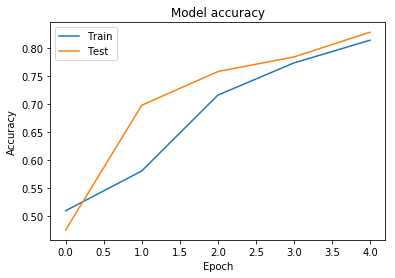

In [24]:
# Plotting some items in gray scale 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Saving and loading the model



In [29]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

scores = model.evaluate(x_test_embedded, y_test_cat, batch_size=512, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 58.78%


In [32]:

predicted_classes = model.predict(x_to_predict_embedded).argmax(axis=1)
print(predicted_classes)


[27 27  6 ... 27  6 27]


In [34]:
prediction_label = indexToLabel(predicted_classes)
prediction_data = np.column_stack((id_to_predict,prediction_label))

In [39]:
np.savetxt("2988887_Crespi_topic1_result.txt", prediction_data, delimiter='\t', fmt='%s')